In [6]:
# basic tools import
import sys
sys.path.append('/home/fabiolm/jxpss/')
from obs.ixpe_dates import *
from xspec_libf.files import *
from xspec_libf.io_x import *
from xspec_libf.fit import *
from xspec_libf.plot import *
#from xspec_libf.pcube import *
#from xspec_libf.evlist import *
from xspec_libf.model import *
from xspec_libf.stat import *

In [7]:
# other imports
from ixpeobssim.utils.logging_ import logger
logger = logging.getLogger('ixpeobssim')
logger.setLevel(30)
logger = logging.getLogger('gpdsw')
logger.setLevel(30)

import pandas as pd
from gpdswpy.monitoring import imet2date, str2imet, imet2mdate
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.dates as mdates
import shutil

In [8]:
# %load_ext wurlitzer
%matplotlib notebook
# %matplotlib qt
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Run FTOOLS with os.command
%env HEADASNOQUERY=
%env HEADASPROMPT=/dev/null

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


env: HEADASNOQUERY=
env: HEADASPROMPT=/dev/null


In [9]:
PATH_SWIFT = '/media/fabiolm/Data/flight_data/1rxsj170849/SWIFT/00035318179/xrt/event/'

In [10]:
#FIT ALL THE DU
##################clear the data loaded in pyxspec DON'T REMOVE############################
s = None
xspec.Plot.commands = ()
xspec.AllData.clear()
xspec.Xset.closeLog()
########################################################################
startE = 0.5 # dot for keV otherwise channels
endE = 8. # keV
s=Spectrum('/media/fabiolm/Data/flight_data/1rxsj170849/SWIFT/00035318179/xrt/event/00035318179_rb.pi')
s.ignore(f"**-{startE} {endE}-**")
model = xspec.Model("TBabs*(bbody+bbody)")
model_expression = model.expression  
print(model_expression)
print(f'E_min = {startE}, E_max = {endE}')
ncomp = len(model.componentNames)
for icomp in model.componentNames:
    print (icomp,eval(f'model.{icomp}.parameterNames'))
AllModels(1).TBabs.nH = 1.36
AllModels(1).TBabs.nH.frozen=True    
AllModels(1).bbody.kT = 0.456
#AllModels(1).powerlaw.PhoIndex = 2.792  
#AllModels(1).powerlaw.PhoIndex.frozen=True
AllModels(1).bbody_3.kT = 1.
Plot("data")
Plot.xAxis = "keV"


#FIT: statistic and parameter
xspec.Fit.statMethod = "chi"
xspec.Fit.query = 'yes'
xspec.Fit.perform()
xspec.Fit.show()

par_names = []
par_values = []
par_errors = []
print(model.nParameters)
for i in range(model.nParameters):
    par = model(i + 1)
    par_names.append(par.name)
    
    par_values.append(par.values[0])
    par_errors.append(par.sigma)
    print(f'{par_names[i]} = {par_values[i]} +/- {par_errors[i]}')    
    
 
   
chi2 = xspec.Fit.statistic
dof = xspec.Fit.dof
chi2r = chi2/dof
print('chi2 =',chi2)
print('dof =',dof)
print('chi2r =',chi2r)


Plot command list is now empty
TBabs(bbody + bbody)
E_min = 0.5, E_max = 8.0
TBabs ['nH']
bbody ['kT', 'norm']
bbody_3 ['kT', 'norm']
5
nH = 1.36 +/- 0.0
kT = 0.32070682591687205 +/- 0.017633141862025165
norm = 0.0009330305382358789 +/- 5.9695617500027616e-05
kT = 1.1220011132204137 +/- 0.10512699105102381
norm = 0.00037752939928650407 +/- 2.8262307181463763e-05
chi2 = 65.67929311052117
dof = 54
chi2r = 1.216283205750392


In [11]:
#FIT ALL THE DU
##################clear the data loaded in pyxspec DON'T REMOVE############################
s = None
xspec.Plot.commands = ()
xspec.AllData.clear()
xspec.Xset.closeLog()
########################################################################
startE = 0.5 # dot for keV otherwise channels
endE = 8. # keV
s=Spectrum('/media/fabiolm/Data/flight_data/1rxsj170849/SWIFT/00035318179/xrt/event/00035318179_rb.pi')
s.ignore(f"**-{startE} {endE}-**")
model = xspec.Model("TBabs*(powerlaw)")
model_expression = model.expression  
print(model_expression)
print(f'E_min = {startE}, E_max = {endE}')
ncomp = len(model.componentNames)
for icomp in model.componentNames:
    print (icomp,eval(f'model.{icomp}.parameterNames'))
AllModels(1).TBabs.nH = 1.36
AllModels(1).TBabs.nH.frozen=True    
#AllModels(1).bbody.kT = 0.456
#AllModels(1).bbody_3.kT = 1
AllModels(1).powerlaw.PhoIndex = 2.792  
#AllModels(1).powerlaw.PhoIndex.frozen=True

Plot("data")
Plot.xAxis = "keV"


#FIT: statistic and parameter
xspec.Fit.statMethod = "chi"
xspec.Fit.query = 'yes'
xspec.Fit.perform()
xspec.Fit.show()

par_names = []
par_values = []
par_errors = []
print(model.nParameters)
for i in range(model.nParameters):
    par = model(i + 1)
    par_names.append(par.name)
    
    par_values.append(par.values[0])
    par_errors.append(par.sigma)
    print(f'{par_names[i]} = {par_values[i]} +/- {par_errors[i]}')    
    
 
   
chi2 = xspec.Fit.statistic
dof = xspec.Fit.dof
chi2r = chi2/dof
print('chi2 =',chi2)
print('dof =',dof)
print('chi2r =',chi2r)


Plot command list is now empty
TBabs*powerlaw
E_min = 0.5, E_max = 8.0
TBabs ['nH']
powerlaw ['PhoIndex', 'norm']
3
nH = 1.36 +/- 0.0
PhoIndex = 2.8838619865321204 +/- 0.06868888801831162
norm = 0.05017300649537424 +/- 0.002989484011578534
chi2 = 57.57498726882679
dof = 56
chi2r = 1.0281247726576213


In [12]:
def add_ax_model_pars(ax, precision=6):
    ax.axis('off')
    string = []
    string.append(f'Fitting with {AllModels(1).expression}')
    
    chi2 = Fit.statistic
    dof = Fit.dof
    string.append(f'  chi2={chi2:.1f} with {dof} dof, chi2r={chi2/dof:.2f}')
    
    for i in range(AllModels(1).nParameters):
        par = AllModels(1)(i + 1)
        if not(par.frozen):
            
            try: 
                par_min, par_max = xc_error1d(par, cl=nsigma1d2cl(1)) 
                _string = f'   {par.name} (1d) = {par.values[0]:.{precision}f} +'+\
                    f'{par_max-par.values[0]:.{precision}f}-{par.values[0]-par_min:.{precision}f}'
            except Exception:
                _string = f'   {par.name} (sigma) = {par.values[0]:.{precision}f} +/- {par.sigma:.{precision}f}'
        else:
            _string = f'   {par.name} (error 1d) = {par.values[0]:.{precision}f} (frozen)'
        string.append(_string)
    
    for i,_s in enumerate(string):
        x = ax.set_xlim()[0]
        ax.annotate(_s, xy=(x,0.9-0.1*i), ha='left', va='center', fontsize=7)

In [13]:
fig, ax = plt.subplots(3, 1, tight_layout = True,
                       sharex = True, figsize=(5,6),
                       gridspec_kw={'height_ratios': [3, 3,4]})
Plot.xAxis = "keV"
Plot.background = True
Plot.add = True # to show spectral components
Plot("data")
(x_label, y_label, title) = Plot.labels()
en = np.array(Plot.x())
en_err = np.array(Plot.xErr())

mean_bkg = np.empty((en.shape[0], 0))

_ax = ax[1]
_c = f'C{0}'

_rate = np.array(Plot.y(1))
_rate_err = np.array(Plot.yErr(1))
_ax.errorbar(en, _rate, 
             xerr = en_err, yerr = _rate_err,
             color = _c, ls='', marker='.')
_model = np.array(Plot.model(1))
_ax.plot(en, _model, color = 'C1', alpha=1)

_ax.set_ylabel(f'{y_label}')
_ax.grid()
_ax.set_yscale('log')
_ax.set_ylim(bottom = 1e-5)
#_ax.set_ylim(0,0.08)
_ax.set_xlim(startE,endE)

mean_bkg = np.append(mean_bkg, 
                     np.expand_dims(np.array(Plot.backgroundVals(1)), axis=1), axis=1)

#_ax.step(en, np.mean(mean_bkg, axis=1), color='k', label='Mean bkg',       
#           where='mid')

_ax = ax[2]
_ax.errorbar(en, (_rate-_model)/_rate_err, 
             xerr = en_err, yerr = _rate_err/_rate_err,
              color = _c, ls='', marker='.')
_ax.axhline(0, color = 'k', ls = '--')

_ax.set_xlabel(f'{x_label}')
_ax.set_ylabel('(data-model)/error')
_ax.grid()
_ax.set_ylim(-4, 4)
    


#for i, _l in zip(range(2), ['bbody_1', 'bbody_2#']):
#    # The sum of the two components is the model
#    _det = 1
#    _comp = Plot.addComp(i+1, 1, 1)
#    ax[1].plot(en, _comp, lw = 1, color= 'gray', ls = ['--', ':'][i],
#               label = _l)

ax[1].legend()

add_ax_model_pars(ax[0],6)

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.


In [69]:

file_list=['/media/fabiolm/Data/flight_data/1rxsj170849/event_l2/ixpe01003199_det1_evt2_v01_rej_bar_src_wgt_PHA1.fits',
           '/media/fabiolm/Data/flight_data/1rxsj170849/event_l2/ixpe01003199_det2_evt2_v01_rej_bar_src_wgt_PHA1.fit',
           '/media/fabiolm/Data/flight_data/1rxsj170849/event_l2/ixpe01003199_det3_evt2_v01_rej_bar_src_wgt_PHA1.fits']# 4:4 /media/fabiolm/Data/flight_data/1rxsj170849/SWIFT/00035318179/xrt/event/00035318179_rb.pi")

load_str = ''
for _d in enumerate(file_list):
    print(_d)
    for index in enumerate(file_list):

        _f = file_list[_d]
        load_str += f'{_d}:{index} {_f} '
        print(load_str)
#            if verbose:
#                print(f'Loaded at {_d}:{index}: {os.path.basename(_f)}') 
#AllData(load_str)
#

0
0:(0, '/') /media/fabiolm/Data/flight_data/1rxsj170849/event_l2/ixpe01003199_det1_evt2_v01_rej_bar_src_wgt_PHA1.fits 
0:(1, 'm') /media/fabiolm/Data/flight_data/1rxsj170849/event_l2/ixpe01003199_det1_evt2_v01_rej_bar_src_wgt_PHA1.fits 
0:(2, 'e') /media/fabiolm/Data/flight_data/1rxsj170849/event_l2/ixpe01003199_det1_evt2_v01_rej_bar_src_wgt_PHA1.fits 
0:(3, 'd') /media/fabiolm/Data/flight_data/1rxsj170849/event_l2/ixpe01003199_det1_evt2_v01_rej_bar_src_wgt_PHA1.fits 
0:(4, 'i') /media/fabiolm/Data/flight_data/1rxsj170849/event_l2/ixpe01003199_det1_evt2_v01_rej_bar_src_wgt_PHA1.fits 
0:(5, 'a') /media/fabiolm/Data/flight_data/1rxsj170849/event_l2/ixpe01003199_det1_evt2_v01_rej_bar_src_wgt_PHA1.fits 
0:(6, '/') /media/fabiolm/Data/flight_data/1rxsj170849/event_l2/ixpe01003199_det1_evt2_v01_rej_bar_src_wgt_PHA1.fits 
0:(7, 'f') /media/fabiolm/Data/flight_data/1rxsj170849/event_l2/ixpe01003199_det1_evt2_v01_rej_bar_src_wgt_PHA1.fits 
0:(8, 'a') /media/fabiolm/Data/flight_data/1rxsj170849

In [72]:
##FIT ALL THE DU
##################clear the data loaded in pyxspec DON'T REMOVE############################
s = None
xspec.Plot.commands = ()
xspec.AllData.clear()
xspec.Xset.closeLog()
########################################################################
startE = 2 # dot for keV otherwise channels
endE = 8. # keV

#s1=Spectrum("1:1 /media/fabiolm/Data/flight_data/1rxsj170849/event_l2/ixpe01003199_det1_evt2_v01_rej_bar_src_wgt_PHA1.fits")
#s1.background = "/media/fabiolm/Data/flight_data/gx9+9/01002401/event_l2/ixpe01002401_det1_evt2_v01_bar_bkg_wgt_PHA1.fits"
#s1.response = "/home/fabiolm/IXPESW/ixpeobssim/ixpeobssim/caldb/ixpe/gpd/cpf/rmf/ixpe_d1_obssim_alpha075_v012.rmf"
#s1.response.arf="/home/fabiolm/IXPESW/ixpeobssim/ixpeobssim/caldb/ixpe/gpd/cpf/arf/ixpe_d1_obssim_alpha075_v012.arf"

#s2=Spectrum('/media/fabiolm/Data/flight_data/gx9+9/01002401/event_l2/ixpe01002401_det2_evt2_v01_bar_src_wgt_PHA1.fits')
#s2.background = "/media/fabiolm/Data/flight_data/gx9+9/01002401/event_l2/ixpe01002401_det2_evt2_v01_bar_bkg_wgt_PHA1.fits"
#s2.response = "/home/fabiolm/IXPESW/ixpeobssim/ixpeobssim/caldb/ixpe/gpd/cpf/rmf/ixpe_d2_obssim_alpha075_v012.rmf"
#s2.response.arf="/home/fabiolm/IXPESW/ixpeobssim/ixpeobssim/caldb/ixpe/gpd/cpf/arf/ixpe_d2_obssim_alpha075_v012.arf"
#s3=Spectrum('/media/fabiolm/Data/flight_data/gx9+9/01002401/event_l2/ixpe01002401_det3_evt2_v01_bar_src_wgt_PHA1.fits')
#s3.background = "/media/fabiolm/Data/flight_data/gx9+9/01002401/event_l2/ixpe01002401_det3_evt2_v01_bar_bkg_wgt_PHA1.fits"
#s3.response = "/home/fabiolm/IXPESW/ixpeobssim/ixpeobssim/caldb/ixpe/gpd/cpf/rmf/ixpe_d3_obssim_alpha075_v012.rmf"
#s3.response.arf="/home/fabiolm/IXPESW/ixpeobssim/ixpeobssim/caldb/ixpe/gpd/cpf/arf/ixpe_d3_obssim_alpha075_v012.arf"
#
#s4=Spectrum('/media/fabiolm/Data/flight_data/gx9+9/NuSTAR/nu30801021002_A_optsnmin_3.pi')
#s4.background = "/media/fabiolm/Data/flight_data/gx9+9/NuSTAR/nu30801021002_B_bk.pha"
#s4.response = "/media/fabiolm/Data/flight_data/gx9+9/NuSTAR/nu30801021002_A_sr.rmf"
#s4.response.arf="/media/fabiolm/Data/flight_data/gx9+9/NuSTAR/nu30801021002_A_sr.arf"
#
#s5=Spectrum('/media/fabiolm/Data/flight_data/gx9+9/NuSTAR/nu30801021002_B_optsnmin_3.pi')
#s5.background = "/media/fabiolm/Data/flight_data/gx9+9/NuSTAR/nu30801021002_B_bk.pha"
#s5.response = "/media/fabiolm/Data/flight_data/gx9+9/NuSTAR/nu30801021002_B_sr.rmf"
#s5.response.arf="/media/fabiolm/Data/flight_data/gx9+9/NuSTAR/nu30801021002_B_sr.arf"







AllData("1:1 /media/fabiolm/Data/flight_data/1rxsj170849/event_l2/ixpe01003199_det1_evt2_v01_rej_bar_src_wgt_PHA1.fits")
AllData("2:2 /media/fabiolm/Data/flight_data/1rxsj170849/event_l2/ixpe01003199_det2_evt2_v01_rej_bar_src_wgt_PHA1.fits")
AllData("3:3 /media/fabiolm/Data/flight_data/1rxsj170849/event_l2/ixpe01003199_det3_evt2_v01_rej_bar_src_wgt_PHA1.fits")# 4:4 /media/fabiolm/Data/flight_data/1rxsj170849/SWIFT/00035318179/xrt/event/00035318179_rb.pi")


    
    
    
    
#s1.ignore(f"**-{startE} {endE}-**")
    
model = xspec.Model("constant*TBabs*(bbody+bbody)")
model_expression = model.expression  
print(model_expression)
#m1=AllModels(1)
m2=AllModels(2)
m3=AllModels(3)
#m4=AllModels(4)
model_expression = model.expression  
print(model_expression)
ncomp = len(model.componentNames)
for icomp in model.componentNames:
    print (icomp,eval(f'model.{icomp}.parameterNames'))

ncomp = len(model.componentNames)
for icomp in model.componentNames:
    print (icomp,eval(f'model.{icomp}.parameterNames'))
AllModels(1).TBabs.nH = 1.36
AllModels(1).TBabs.nH.frozen=True    
AllModels(1).bbody.kT = 0.456
#AllModels(1).powerlaw.PhoIndex = 2.792  
#AllModels(1).powerlaw.PhoIndex.frozen=True
AllModels(1).bbody_4.kT = 1.    
    
    
AllModels(1).constant.factor=1.0#"1.0,-0.1"
AllModels(1).constant.factor.frozen=True
AllModels(2).constant.factor=0.9693460862750349
#AllModels(2).constant.factor.frozen=False
#AllModels(2).constant.factor.frozen=False
AllModels(3).constant.factor=0.9103651635167163
#AllModels(3).constant.factor.frozen=True
#AllModels(4).constant.factor=1.
#AllModels(4).constant.factor.frozen=True


for i in range(AllData.nSpectra):
#    if i==3 or i==4:
     AllData.ignore(f"{i+1}-1: **-2.0 7.0-**")
#    else:
#        AllData.ignore(f"{i+1}-1: **-2.0 7.0-**")
    
Plot("data")
Plot.xAxis = "keV"


#FIT: statistic and parameter
xspec.Fit.statMethod = "chi"
xspec.Fit.query = 'yes'
xspec.Fit.perform()
xspec.Fit.show()

par_names = []
par_values = []
par_errors = []
print(model.nParameters)
for i in range(model.nParameters):
    par = model(i + 1)
    par_names.append(par.name)
    
    par_values.append(par.values[0])
    par_errors.append(par.sigma)
    print(f'{par_names[i]} = {par_values[i]} +/- {par_errors[i]}')    
    
for i in [1,2,3]:
    par = AllModels(i).constant.factor
    print(f'det{i} norm: {par.values[0]:.4f} +/- {par.sigma:.4f}')    
    
   
chi2 = xspec.Fit.statistic
dof = xspec.Fit.dof
chi2r = chi2/dof
print('chi2 =',chi2)
print('dof =',dof)
print('chi2r =',chi2r)


Plot command list is now empty
constant*TBabs(bbody + bbody)
constant*TBabs(bbody + bbody)
constant ['factor']
TBabs ['nH']
bbody ['kT', 'norm']
bbody_4 ['kT', 'norm']
constant ['factor']
TBabs ['nH']
bbody ['kT', 'norm']
bbody_4 ['kT', 'norm']
6
factor = 1.0 +/- 0.0
nH = 1.36 +/- 0.0
kT = 0.27737910809685123 +/- 0.002797686322838531
norm = 0.001262790347373643 +/- 2.7002471398903958e-05
kT = 0.8122546680126123 +/- 0.008165032579106262
norm = 0.0003877769105919192 +/- 5.070901489208753e-06
det1 norm: 1.0000 +/- 0.0000
det2 norm: 0.6171 +/- 0.0038
det3 norm: 0.6122 +/- 0.0038
chi2 = 54255.24964134004
dof = 868
chi2r = 62.50604797389405


<IPython.core.display.Javascript object>


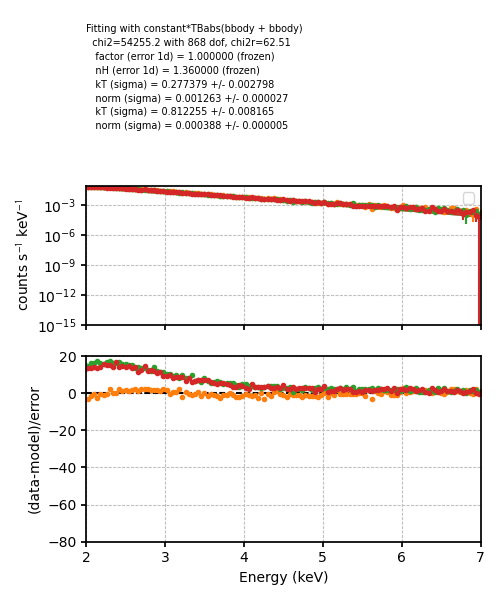

No handles with labels found to put in legend.


In [75]:
fig, ax = plt.subplots(3, 1, tight_layout = True,
                       sharex = True, figsize=(5,6),
                       gridspec_kw={'height_ratios': [3, 3,4]})
Plot.xAxis = "keV"
Plot.background = True
Plot.add = True # to show spectral components
Plot("data")
(x_label, y_label, title) = Plot.labels()


#mean_bkg = np.empty((en.shape[0], 0))

_ax = ax[1]



for _s in [1,2,3]:
    en = np.array(Plot.x(_s))
    en_err = np.array(Plot.xErr(_s))
    _rate = np.array(Plot.y(_s))
    _rate_err = np.array(Plot.yErr(_s))
    _ax.errorbar(en, _rate, 
                 xerr = en_err, yerr = _rate_err,
                 color = f'C{_s}', ls='', marker='.')
    _model = np.array(Plot.model(_s))
    _ax.plot(en, _model, color = f'C{_s}', alpha=1)
    
_ax.set_ylabel(f'{y_label}')
_ax.grid()
_ax.set_yscale('log')
#_ax.set_ylim(bottom = 1e-5)
#_ax.set_ylim(0,0.08)
_ax.set_xlim(2.0,7.0)

#mean_bkg = np.append(mean_bkg, 
#                     np.expand_dims(np.array(Plot.backgroundVals(1)), axis=1), axis=1)
#
#_ax.step(en, np.mean(mean_bkg, axis=1), color='k', label='Mean bkg',       
#           where='mid')

_ax = ax[2]
for _s in [1,2,3]:
    en = np.array(Plot.x(_s))
    en_err = np.array(Plot.xErr(_s))
    _rate = np.array(Plot.y(_s))
    _rate_err = np.array(Plot.yErr(_s))
    _model = np.array(Plot.model(_s))
    _ax.errorbar(en, (_rate-_model)/_rate_err, 
                 xerr = en_err, yerr = _rate_err/_rate_err,
                  color = f'C{_s}', ls='', marker='.')
_ax.axhline(0, color = 'k', ls = '--')

_ax.set_xlabel(f'{x_label}')
_ax.set_ylabel('(data-model)/error')
_ax.grid()
#_ax.set_ylim(-8, 8)
    


#for i, _l in zip(range(2), ['bbody_1', 'bbody_2#']):
#    # The sum of the two components is the model
#    _det = 1
#    _comp = Plot.addComp(i+1, 1, 1)
#    ax[1].plot(en, _comp, lw = 1, color= 'gray', ls = ['--', ':'][i],
#               label = _l)

ax[1].legend()

add_ax_model_pars(ax[0],6)